# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [34]:

# Define an empty list to fetch the weather data for each city

city_name =[]
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counter
record_count = 1

# Loop through all the cities in our list to fetch weather data
for city in cities:

    # Log the url, record, and set numbers
    print("Processing Record %s | %s" % (record_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_clouds.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | san jeronimo
Processing Record 2 | tomatlan
Processing Record 3 | nikolskoye
Processing Record 4 | ponta do sol
Processing Record 5 | mount gambier
Processing Record 6 | punta arenas
Processing Record 7 | margate
Processing Record 8 | komsomolskiy
Processing Record 9 | desenzano del garda
Processing Record 10 | saint-philippe
Processing Record 11 | nouadhibou
Processing Record 12 | viedma
Processing Record 13 | aklavik
Processing Record 14 | cayenne
Processing Record 15 | vaini
Processing Record 16 | albany
Processing Record 17 | kapaa
Processing Record 18 | atuona
Processing Record 19 | hermanus
Processing Record 20 | bluff
Processing Record 21 | castro
Processing Record 22 | deputatskiy
Processing Record 23 | altayskoye
Processing Record 24 | finschhafen
Processing Record 25 | cockburn town
Processing Record 26 | khatanga
Processing Record 27 | nirsa
Processing Record 28 | san andres
Processing Record 2

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_dict = {
    "City": city_name, 
    "Latitude": city_lat, 
    "Longitude": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date}

city_data_df = pd.DataFrame(city_dict)


# Show Record Count
city_data_df.count()

City          567
Latitude      567
Longitude     567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Jerónimo,-11.9472,-75.2829,14.55,68,75,2.22,PE,1675376196
1,Tomatlán,19.9333,-105.2500,32.26,28,13,4.57,MX,1675376196
2,Nikolskoye,59.7035,30.7861,-1.06,98,100,0.81,RU,1675376196
3,Ponta do Sol,32.6667,-17.1000,15.35,47,46,3.83,PT,1675376196
4,Mount Gambier,-37.8333,140.7667,9.65,82,95,5.51,AU,1675376197


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,San Jerónimo,-11.9472,-75.2829,14.55,68,75,2.22,PE,1675376196
1,Tomatlán,19.9333,-105.2500,32.26,28,13,4.57,MX,1675376196
2,Nikolskoye,59.7035,30.7861,-1.06,98,100,0.81,RU,1675376196
3,Ponta do Sol,32.6667,-17.1000,15.35,47,46,3.83,PT,1675376196
4,Mount Gambier,-37.8333,140.7667,9.65,82,95,5.51,AU,1675376197


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

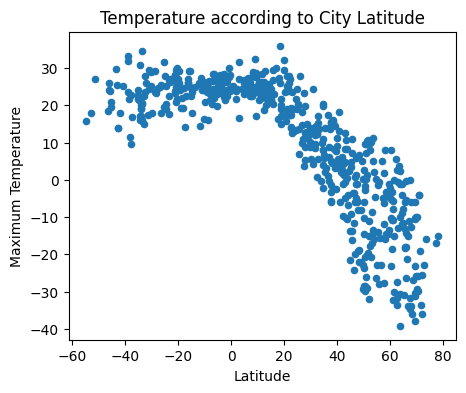

In [39]:
# Build scatter plot for latitude vs. temperature

#Add to scatterplot
lat_temp_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Max Temp",
        title="Temperature according to City Latitude", 
        ylabel="Maximum Temperature",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

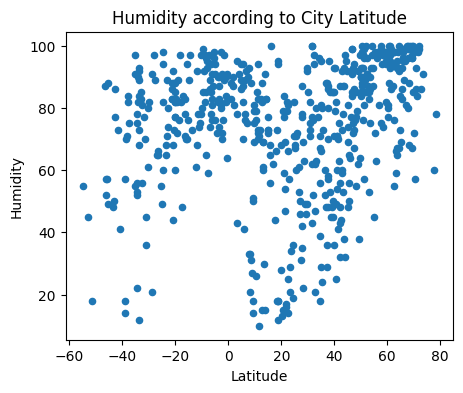

In [40]:
# Build the scatter plots for latitude vs. humidity

#Add to scatterplot
lat_hum_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Humidity",
        title="Humidity according to City Latitude", 
        ylabel="Humidity",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

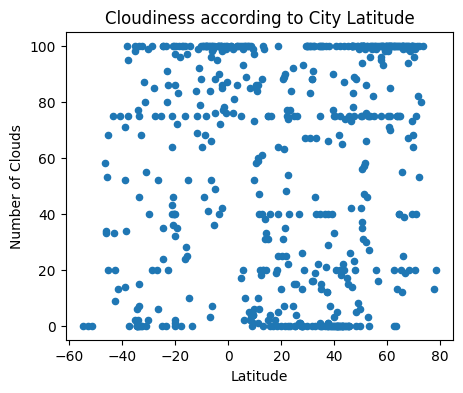

In [41]:
# Build the scatter plots for latitude vs. cloudiness

#Add to scatterplot
lat_cloud_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Cloudiness",
        title="Cloudiness according to City Latitude", 
        ylabel="Number of Clouds",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

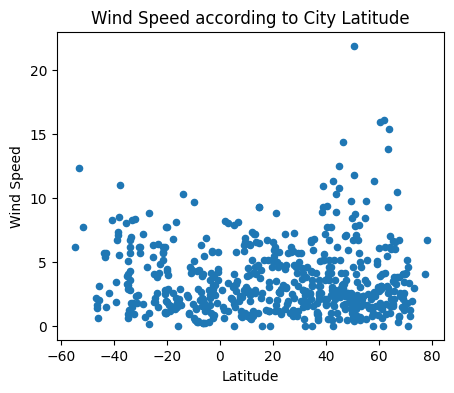

In [42]:
# Build the scatter plots for latitude vs. wind speed

#Add to scatterplot
lat_cloud_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Wind Speed",
        title="Wind Speed according to City Latitude", 
        ylabel="Wind Speed",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE